In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import truncnorm

In [2]:
df = pd.read_csv("unclean_smartwatch_health_data.csv")

In [3]:
df.shape

(10000, 7)

In [4]:
df.head(10)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
7,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
8,3979.0,93.340338,97.218945,1775.029578,5.468413771417153,Seddentary,1
9,3169.0,51.409967,97.272787,7940.021452,7.9544989905339145,Seddentary,8


In [5]:
"""
df = df.loc[
    (~pd.isna(df["Sleep Duration (hours)"]))
    & (~pd.isna(df["User ID"]))
    & (~pd.isna(df["Heart Rate (BPM)"]))
    & (~pd.isna(df["Stress Level"]))
    ,
    :
]
"""

for c in df.columns:
    df = df.dropna( subset = [c] )

In [6]:
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [7]:
df["User ID"] = df["User ID"].astype("int64")
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].replace("ERROR", '0')
df["Sleep Duration (hours)"] = df["Sleep Duration (hours)"].astype("float64")
df["Activity Level"] = df["Activity Level"].str.replace("_", " ")
df["Stress Level"] = df["Stress Level"].replace("Very High", "9")

In [8]:
df.columns

Index(['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count',
       'Sleep Duration (hours)', 'Activity Level', 'Stress Level'],
      dtype='object')

In [9]:
df.columns = ["user", "heart_rate", "blood_oxygen_level", "step_count",
       "sleep_duration", "activity_level", "stress_level"]

In [10]:
cat_cols = [ c for c in df.columns if df[c].dtypes == "O" ]
num_cols = [ c for c in df.columns if df[c].dtypes == "int64" or df[c].dtypes == "float64" ]

In [11]:
cat_cols

['activity_level', 'stress_level']

In [12]:
num_cols.remove("user")

num_cols

['heart_rate', 'blood_oxygen_level', 'step_count', 'sleep_duration']

In [13]:
for c in num_cols:
    df[c] = df[c].round(2)

In [14]:
prob_freq = df.groupby( cat_cols, as_index = False ).agg({
    "user": ["count"]
})

In [15]:
prob_freq.columns = cat_cols + ["user"]

In [16]:
prob_freq

,activity_level,stress_level,user
0,Active,1,146
1,Active,10,146
2,Active,2,138
3,Active,3,138
4,Active,4,159
5,Active,5,130
6,Active,6,125
7,Active,7,153
8,Active,8,129
9,Active,9,160


In [17]:
prob_freq["user"] = prob_freq["user"] / df.shape[0]

In [18]:
np.sum(prob_freq["user"])

np.float64(1.0)

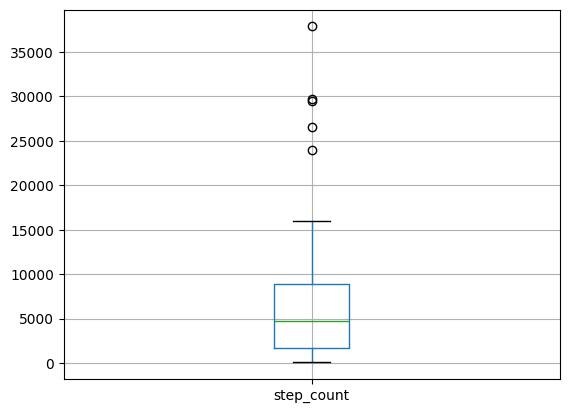

In [19]:
df.loc[
    ( df["activity_level"] == "Active" )
    & ( df["stress_level"] == "8" )
    , 
    ["step_count"]
].boxplot()

plt.show()

In [20]:
transformations = {}
new_cols = []
for c in num_cols:
    transformations[c] = [ 
            ( "lower_bound" , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))  )
            , ( "upper_bound" , lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25))  )
    ]
    new_cols.append( f"{c}_lower_bound" )
    new_cols.append( f"{c}_upper_bound" )

In [21]:
df_resultados = df.groupby( cat_cols , as_index=False ).agg(transformations)

In [22]:
df_resultados.columns =  cat_cols + new_cols

In [23]:
df_resultados.head(10)

,activity_level,stress_level,heart_rate_lower_bound,heart_rate_upper_bound,blood_oxygen_level_lower_bound,blood_oxygen_level_upper_bound,step_count_lower_bound,step_count_upper_bound,sleep_duration_lower_bound,sleep_duration_upper_bound
0,Active,1,29.90375,120.87375,92.05375,104.28375,-5957.06500,17240.43500,2.30500,10.76500
1,Active,10,39.94375,113.01375,92.15500,103.39500,-9130.64625,20702.18375,3.13000,9.71000
2,Active,2,30.91500,117.23500,92.94875,103.03875,-7607.51000,18085.35000,3.15000,10.01000
3,Active,3,34.14125,111.65125,92.62500,103.18500,-10223.44625,22601.50375,2.81375,10.14375
4,Active,4,38.26000,113.30000,91.93250,103.31250,-10848.04500,26123.03500,1.93000,10.73000
5,Active,5,28.15250,119.45250,93.28375,102.63375,-9077.73250,19624.80750,2.85125,10.30125
6,Active,6,45.85500,109.41500,91.60500,104.36500,-11255.58500,24630.53500,1.68500,10.84500
7,Active,7,27.78000,120.58000,92.36000,103.64000,-9507.50500,20091.57500,2.46000,10.70000
8,Active,8,33.73000,117.33000,92.43000,104.43000,-9062.59000,19734.13000,2.56000,10.72000
9,Active,9,37.15000,112.09000,93.45875,102.68875,-10371.27375,23150.53625,2.25875,10.46875


In [24]:
df_bound = df.merge(
    df_resultados
    , on = cat_cols
    , how = "inner"
)

In [25]:
for c in num_cols:
    df_bound = df_bound.loc[ 
        ( df_bound[c] > df_bound[f"{c}_lower_bound"] )
        &
        ( df_bound[c] < df_bound[f"{c}_upper_bound"] )
        , :
    ]

In [26]:
df_bound

,user,heart_rate,blood_oxygen_level,step_count,sleep_duration,activity_level,stress_level,heart_rate_lower_bound,heart_rate_upper_bound,blood_oxygen_level_lower_bound,blood_oxygen_level_upper_bound,step_count_lower_bound,step_count_upper_bound,sleep_duration_lower_bound,sleep_duration_upper_bound
0,4174,58.94,98.81,5450.39,7.17,Highly Active,1,34.42125,117.21125,92.88750,103.40750,-8432.70000,18730.18000,2.52875,10.61875
2,2294,40.00,96.89,13797.34,7.37,Actve,3,38.22750,113.74750,93.02250,102.44250,-10296.09250,21276.26750,2.15375,11.08375
3,2095,96.29,94.20,10205.99,8.38,Highly Active,10,36.76125,114.45125,92.74125,103.37125,-10048.80750,22705.71250,1.85000,11.13000
4,4772,47.27,95.39,3208.78,7.87,Seddentary,2,35.12500,116.30500,92.70250,103.64250,-8860.56625,19067.36375,2.54625,10.67625
5,4092,81.73,95.98,6051.25,5.22,Sedentary,1,28.67125,122.72125,93.24750,103.14750,-10321.33625,23262.49375,2.31000,10.23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8538,1942,77.91,98.64,10061.15,5.43,Seddentary,10,30.84500,120.48500,92.92500,102.72500,-11231.48000,23740.04000,2.28000,10.68000
8539,1524,78.82,98.93,2948.49,7.40,Active,7,27.78000,120.58000,92.36000,103.64000,-9507.50500,20091.57500,2.46000,10.70000
8540,4879,48.63,95.77,4725.62,6.38,Sedentary,2,29.12500,117.08500,92.32750,103.62750,-8194.81000,18158.11000,2.34750,10.96750
8541,2624,73.83,97.95,2571.49,6.92,Sedentary,4,38.81750,116.71750,92.22875,103.73875,-8244.46250,19743.33750,2.62500,9.88500


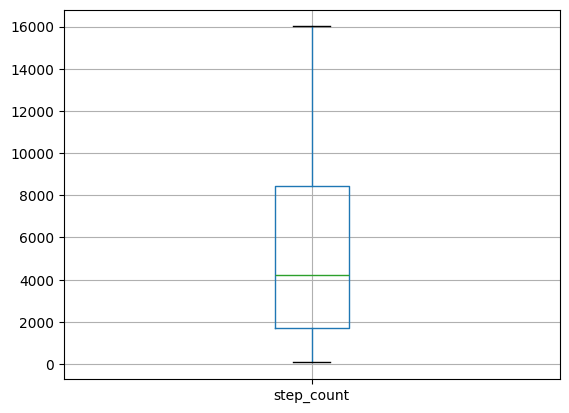

In [27]:
df_bound.loc[
    ( df_bound["activity_level"] == "Active" )
    & ( df_bound["stress_level"] == "8" )
    , 
    ["step_count"]
].boxplot()

plt.show()

In [28]:
df_clean = df_bound.loc[ : , cat_cols + num_cols ]

In [29]:
summ_aggregations = {}
cols_summ = []
for c in num_cols:
    summ_aggregations[c] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{c}_min" )
    cols_summ.append( f"{c}_max" )
    cols_summ.append( f"{c}_mean" )
    cols_summ.append( f"{c}_std" )

In [30]:
df_summ = df_clean.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)

In [31]:
df_summ.columns = cat_cols +  cols_summ

In [32]:
random.seed(333)

n = 100*1000
ids = np.random.choice( prob_freq.index , size = n, p = prob_freq["user"].to_list() )

In [33]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    # Calcular los límites 'a' y 'b' para la función truncnorm
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    # Generar muestras de la distribución normal truncada
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [34]:
dfextended = pd.DataFrame()
for i in prob_freq.index:
    setting = {
        "id": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = trunc_vector( 
            df_summ.iloc[i][f"{c}_min"]
            , df_summ.iloc[i][f"{c}_max"]
            , df_summ.iloc[i][f"{c}_mean"]
            , df_summ.iloc[i][f"{c}_std"]
            , len( ids[ ids == i ] )
        )
    tmp = pd.DataFrame(setting)
    dfextended = pd.concat( [ dfextended , tmp ] )

In [35]:
prob_freq["id"] = prob_freq.index

In [36]:
final = prob_freq.loc[ : , ["id"] + cat_cols ].merge(
    dfextended
    , on = ["id"]
    , how = "inner"
)

In [37]:
df_clean.groupby(
    cat_cols
    , as_index = False
).agg({
    'step_count': [ "min" , "max" , "mean" , "std" , "count" ]
}).iloc[16]

activity_level                 Actve
stress_level                       6
step_count      min            21.48
                max         19272.98
                mean     5495.423083
                std        4451.0347
                count            133
Name: 16, dtype: object

In [38]:
final.groupby(
    cat_cols
    , as_index = False
).agg({
    'step_count': [ "min" , "max" , "mean" , "std" , "count" ]
}).iloc[16]

activity_level                  Actve
stress_level                        6
step_count      min         28.158286
                max      19082.790843
                mean      6246.654848
                std        3720.01865
                count            1692
Name: 16, dtype: object

In [39]:
df.describe()

,user,heart_rate,blood_oxygen_level,step_count,sleep_duration
count,8543.000000,8543.000000,8543.000000,8543.000000,8543.000000
mean,3007.797612,76.034022,97.837543,7000.966052,6.337887
std,1152.746073,19.154003,1.736494,6905.359946,1.810206
min,1001.000000,40.000000,90.790000,0.910000,-0.190000
25%,2000.000000,64.975000,96.660000,1998.410000,5.390000
50%,3004.000000,75.310000,98.000000,4979.820000,6.440000
75%,4005.000000,85.310000,99.370000,9762.115000,7.500000
max,4999.000000,293.220000,100.000000,62486.690000,12.140000


In [40]:
final.describe()

,id,heart_rate,blood_oxygen_level,step_count,sleep_duration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24.559470,75.068222,97.534193,7094.401913,6.488933
std,13.289191,13.794798,1.407761,4189.594852,1.398987
min,0.000000,40.003958,92.435518,4.821162,1.856520
25%,14.000000,65.396255,96.583886,3859.142076,5.518055
50%,25.000000,75.012916,97.643019,6689.209221,6.491390
75%,35.000000,84.652728,98.628293,9819.237885,7.461717
max,49.000000,117.167478,99.999980,25294.843543,11.190630
